In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   

## Data Preparation

In [176]:
# Load the dataset
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [177]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  892 non-null    int64  
 1   Name         892 non-null    object 
 2   Pclass       892 non-null    int64  
 3   Sex          892 non-null    object 
 4   Age          715 non-null    float64
 5   SibSp        892 non-null    int64  
 6   Parch        892 non-null    int64  
 7   Ticket       892 non-null    object 
 8   Fare         892 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     890 non-null    object 
 11  Survived     892 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.8+ KB


In [178]:
# specify categorical and numerical features

categorical_features = df.select_dtypes(include=['object', 'category']).columns
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

print('categorical_features : ', list(categorical_features))
print('numerical_features : ', list(numerical_features))

categorical_features :  ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
numerical_features :  ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']


In [179]:
df.isna().sum()

PassengerId      0
Name             0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          688
Embarked         2
Survived         0
dtype: int64

In [180]:
#  summary statistics
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,892.000000,892.000000,715.000000,892.000000,892.000000,892.000000,892.000000
mean,446.498879,1.186099,29.551287,0.522422,0.381166,32.176793,0.383408
std,257.640579,33.536705,14.822069,1.102264,0.805706,49.672283,0.486489
min,1.000000,-999.000000,-54.000000,0.000000,0.000000,0.000000,0.000000
25%,223.750000,2.000000,20.000000,0.000000,0.000000,7.895800,0.000000
50%,446.500000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,669.250000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


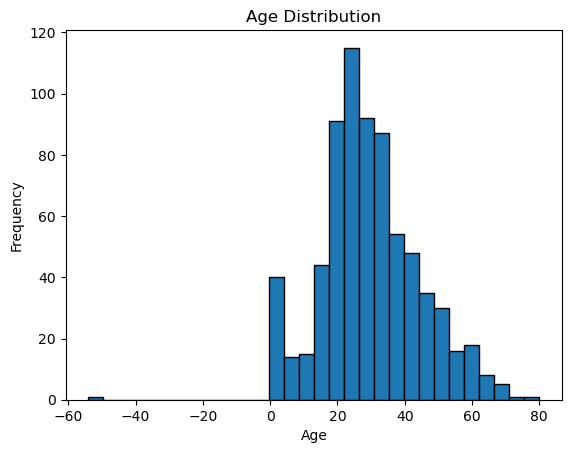

Text(0.5, 1.0, 'Top 10 Cabin Types')

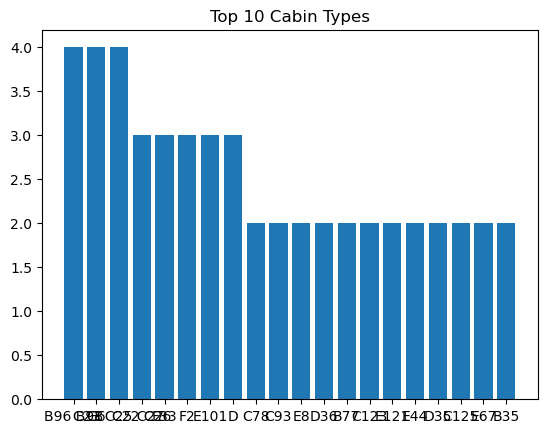

In [181]:
# explore the age distribution
plt.hist(df['Age'].dropna(), bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()    

#explore the cabin feature
plt.bar(df['Cabin'].value_counts().head(20).index, df['Cabin'].value_counts().head(20).values)
plt.title('Top 10 Cabin Types')


In [182]:
# fill missing values in 'Age' with the mean
df['Age'].fillna(df['Age'].mean(), inplace=True)
# fill missing values in 'Embarked' with the mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [183]:
# drop the 'Cabin' column as it has too many missing values
df = df.drop(columns=['Cabin'], axis=1)

In [184]:
df.sample(10)

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
128,129,"Peter, Miss. Anna",3,female,29.551287,1,1,2668,22.3583,C,1
391,392,"Jansson, Mr. Carl Olof",3,male,21.000000,0,0,350034,7.7958,S,1
527,528,"Farthing, Mr. John",1,male,29.551287,0,0,PC 17483,221.7792,S,0
752,753,"Vande Velde, Mr. Johannes Joseph",3,male,33.000000,0,0,345780,9.5000,S,0
811,812,"Lester, Mr. James",3,male,39.000000,0,0,A/4 48871,24.1500,S,0
515,516,"Walker, Mr. William Anderson",1,male,47.000000,0,0,36967,34.0208,S,0
655,656,"Hickman, Mr. Leonard Mark",2,male,24.000000,2,0,S.O.C. 14879,73.5000,S,0
399,400,"Trout, Mrs. William H (Jessie L)",2,female,28.000000,0,0,240929,12.6500,S,1
582,583,"Downton, Mr. William James",2,male,54.000000,0,0,28403,26.0000,S,0
342,343,"Collander, Mr. Erik Gustaf",2,male,28.000000,0,0,248740,13.0000,S,0


## Data Transformation

In [185]:
sex = df['Sex'].unique()
enb = df['Embarked'].unique()

print('sex : ', list(sex))
print('Embarked : ', list(enb))


sex :  ['male', 'female', 'Female', 'F', 'r', 'male ']
Embarked :  ['S', 'C', 'Q']


In [186]:
df[df['Sex']=='r']

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
12,13,"Saundercock, Mr. William Henry",3,r,20.0,0,0,A/5. 2151,8.05,S,0


In [187]:
# Replace variations with standardized values
df['Sex'] = df['Sex'].replace({
    'Female': 'female',
    'F': 'female',
    'r': 'male',
    'male ': 'male'
})

In [188]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df['Sex_encoded'] = label_encoder.fit_transform(df['Sex'])
df['Embarked_encoded'] = label_encoder.fit_transform(df['Embarked'])

In [189]:
# standardize Age & Fare features
from sklearn.preprocessing import StandardScaler    
scaler = StandardScaler()

df['Age_standardized'] = scaler.fit_transform(df[['Age']])
df['Fare_standardized'] = scaler.fit_transform(df[['Fare']])

In [190]:
# FamilySize = SibSp + Parch.
df['FamilySize'] = df['SibSp'] + df['Parch']

In [191]:
df

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,Sex_encoded,Embarked_encoded,Age_standardized,Fare_standardized,FamilySize
0,1,"Braund, Mr. Owen Harris",3,male,22.000000,1,0,A/5 21171,7.2500,S,0,1,2,-0.569437,-0.502107,1
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.000000,1,0,PC 17599,71.2833,C,1,0,0,0.637111,0.787732,1
2,3,"Heikkinen, Miss. Laina",3,female,26.000000,0,0,STON/O2. 3101282,7.9250,S,1,0,2,-0.267800,-0.488510,0
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.000000,1,0,113803,53.1000,S,1,0,2,0.410883,0.421461,1
4,5,"Allen, Mr. William Henry",3,male,35.000000,0,0,373450,8.0500,S,0,1,2,0.410883,-0.485992,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,888,"Graham, Miss. Margaret Edith",1,female,19.000000,0,0,112053,30.0000,S,1,0,2,-0.795664,-0.043848,0
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",3,female,29.551287,1,2,W./C. 6607,23.4500,S,0,0,2,0.000000,-0.175786,3
889,890,"Behr, Mr. Karl Howell",1,male,26.000000,0,0,111369,30.0000,C,1,1,0,-0.267800,-0.043848,0
890,891,"Dooley, Mr. Patrick",3,male,32.000000,0,0,370376,7.7500,Q,0,1,1,0.184656,-0.492035,0


## Exploratory Data Analysis (EDA)

### Relationships between variables

C:\Users\Ayman Rezk\AppData\Local\Temp\ipykernel_19960\1284299275.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(df, x=df['Sex'], y=df['Survived'], ci=None)


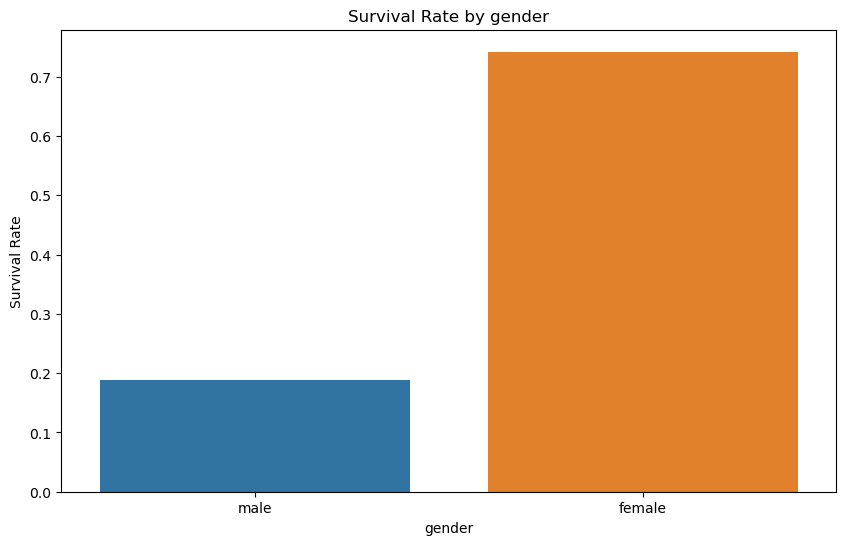

In [192]:
# Survival rate by gender
plt.figure(figsize=(10, 6))
sns.barplot(df, x=df['Sex'], y=df['Survived'], ci=None)
plt.title('Survival Rate by gender')
plt.xlabel('gender')  
plt.ylabel('Survival Rate')
plt.show()



In [193]:
# Survival rate by sex
df.groupby(['Sex'])['Survived'].mean()

Sex
female    0.742038
male      0.188581
Name: Survived, dtype: float64

----

In [194]:
df['Pclass'].unique()

array([   3,    1,    2, -999], dtype=int64)

In [195]:
print(df[df['Pclass']== -999].sum())

# Remove rows where Pclass == -999
df = df[df['Pclass'] != -999]

PassengerId                               20
Name                 Masselmani, Mrs. Fatima
Pclass                                  -999
Sex                                   female
Age                                29.551287
SibSp                                      0
Parch                                      0
Ticket                                  2649
Fare                                   7.225
Embarked                                   C
Survived                                   1
Sex_encoded                                0
Embarked_encoded                           0
Age_standardized                         0.0
Fare_standardized                   -0.50261
FamilySize                                 0
dtype: object


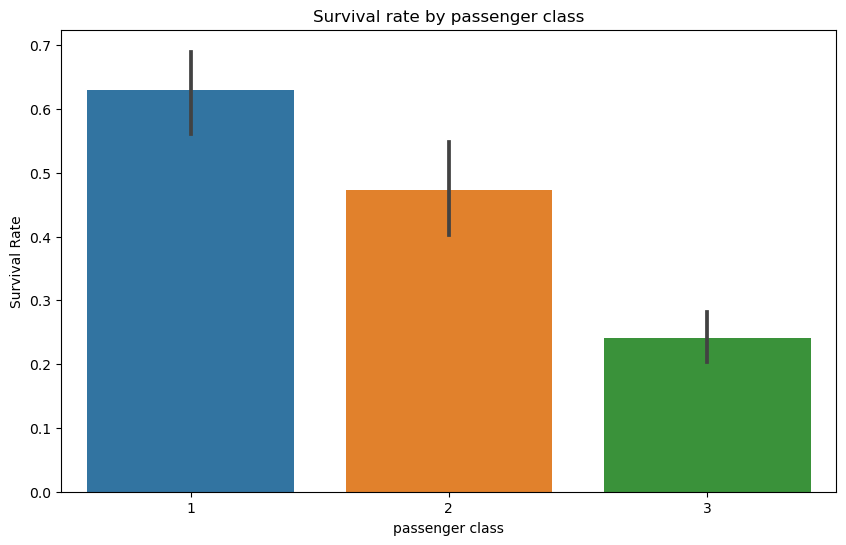

In [196]:
# Survival rate by passenger class
plt.figure(figsize=(10, 6))
sns.barplot(df, x=df['Pclass'], y=df['Survived'])
plt.title('Survival rate by passenger class')
plt.xlabel('passenger class')  
plt.ylabel('Survival Rate')
plt.show()

In [197]:
# Survival rate by passenger class
df.groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.240326
Name: Survived, dtype: float64

---

In [198]:
df['Age'].unique()

array([ 22.        ,  38.        ,  26.        ,  35.        ,
        29.55128671, -54.        ,   2.        ,  27.        ,
        14.        ,   4.        ,  58.        ,  20.        ,
        39.        ,  55.        ,  31.        ,  34.        ,
        15.        ,  28.        ,   8.        ,  19.        ,
        40.        ,  66.        ,  42.        ,  21.        ,
        18.        ,   3.        ,   7.        ,  49.        ,
        29.        ,  65.        ,  28.5       ,   5.        ,
        11.        ,  45.        ,  17.        ,  32.        ,
        16.        ,  25.        ,   0.83      ,  30.        ,
        33.        ,  23.        ,  24.        ,  46.        ,
        59.        ,  71.        ,  37.        ,  47.        ,
        14.5       ,  70.5       ,  32.5       ,  54.        ,
        12.        ,   9.        ,  36.5       ,  51.        ,
        55.5       ,  40.5       ,  44.        ,   1.        ,
        61.        ,  56.        ,  50.        ,  36.  

In [199]:
# Remove rows where age is less than or equal to 0
df = df[df['Age'] > 0]

c:\Users\Ayman Rezk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


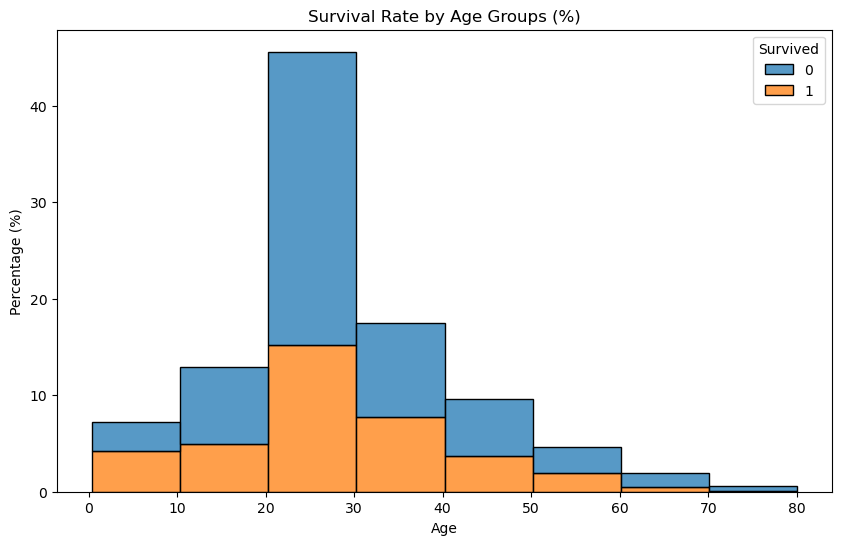

In [200]:
# Survival rate by age groups (percentage)
plt.figure(figsize=(10, 6))
sns.histplot(df, x='Age', hue='Survived', multiple='stack', bins=8, stat='percent')
plt.title('Survival Rate by Age Groups (%)')
plt.xlabel('Age')
plt.ylabel('Percentage (%)')
plt.show()


In [201]:
df.describe()


,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived,Sex_encoded,Embarked_encoded,Age_standardized,Fare_standardized,FamilySize
count,890.000000,890.000000,890.000000,890.000000,890.000000,890.00000,890.000000,890.000000,890.000000,890.000000,890.000000,890.000000
mean,447.471910,2.310112,29.645165,0.523596,0.382022,32.18271,0.383146,0.648315,1.537079,0.007079,0.000119,0.905618
std,257.109243,0.835388,12.984054,1.103224,0.806409,49.71670,0.486427,0.477765,0.790321,0.979118,1.001456,1.614080
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-2.196768,-0.648145,0.000000
25%,225.250000,2.000000,22.000000,0.000000,0.000000,7.90310,0.000000,0.000000,1.000000,-0.569437,-0.488951,0.000000
50%,447.500000,3.000000,29.551287,0.000000,0.000000,14.45420,0.000000,1.000000,2.000000,0.000000,-0.356991,0.000000
75%,669.750000,3.000000,35.000000,1.000000,0.000000,31.00000,1.000000,1.000000,2.000000,0.410883,-0.023704,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.32920,1.000000,1.000000,2.000000,3.804299,9.671828,10.000000


The Age mean converted from `28` to `29`

----

`Identify patterns, anomalies, insights`
- Patterns : the female have high Survived
- Anomalies : Passengers do not put the data well as there is a negative age
- Insights : Higher fare passengers survived more than other (Especially women)

---

## Data Visualization

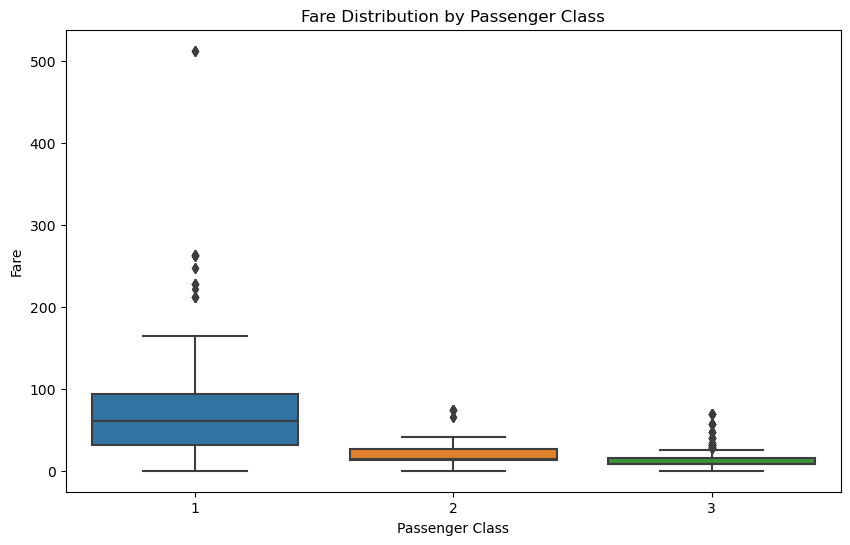

In [202]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Fare Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()

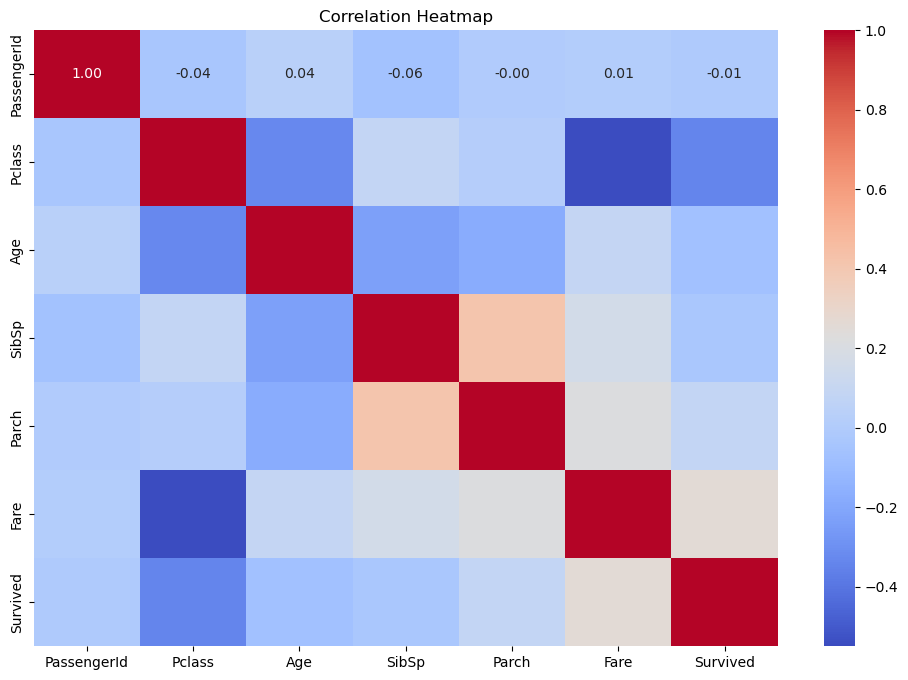

In [204]:
# Heatmap 
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()